In [ ]:
pip install fastdtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import numpy as np
from scipy.signal import savgol_filter

In [ ]:
def delete_random_points(number_points, number_list):
  for i in range(0, number_points):
    index_to_delete = random.randint(0, len(number_list) - 1)
    number_list.pop(index_to_delete)
  return number_list

def interpolate(x, n_points= 10000000):
  x = np.array(x) 
  x_interp = np.interp(np.linspace(0, len(x) - 1, n_points), np.arange(len(x)), x)
  return x_interp  

def dtw_error(x1, y1, x2, y2):
    distance, path = fastdtw(list(zip(x1, y1)), list(zip(x2, y2)))
    error = []
    for i in range(len(path)):
        point1 = (x1[path[i][0]], y1[path[i][0]])
        point2 = (x2[path[i][1]], y2[path[i][1]])
        error.append(euclidean(point1, point2))

    return error


In [ ]:
data_id = 15
df = pd.read_csv(f'data{data_id}.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gt              3 non-null      object
 1   reconstruction  3 non-null      object
 2   amcl            3 non-null      object
 3   ekf             3 non-null      object
dtypes: object(4)
memory usage: 224.0+ bytes


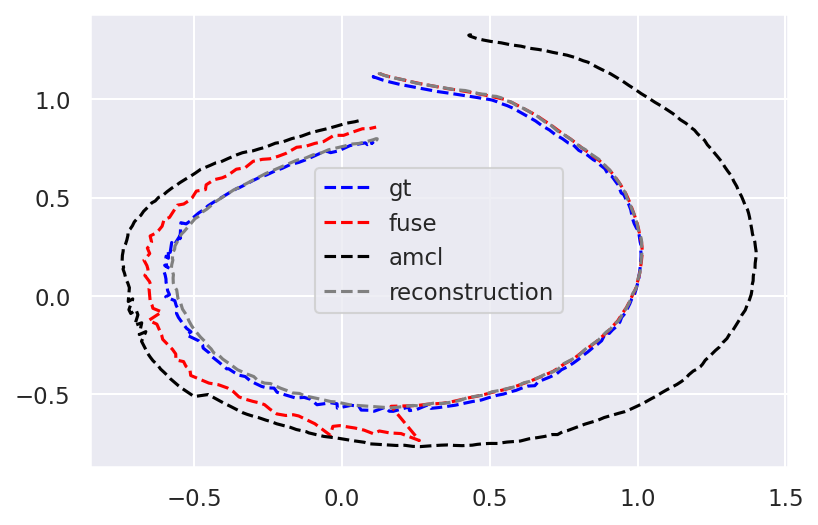

In [ ]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
# plt.xlim(-2, 2)
# plt.ylim(-1.5, 1.5)
sns.set()

limit_min = 0
limit_max = -1
linestyle = 'dashed'

x_gt = eval(df['gt'][0])[limit_min:limit_max]
y_gt = eval(df['gt'][1])[limit_min:limit_max]

x_ekf = eval(df['ekf'][0])[limit_min:-26]
y_ekf = eval(df['ekf'][1])[limit_min:-26]

x_amcl = eval(df['amcl'][0])[limit_min:-20]
y_amcl = eval(df['amcl'][1])[limit_min:-20]

x_reconstruction = eval(df['reconstruction'][0])[limit_min:limit_max]
y_reconstruction = eval(df['reconstruction'][1])[limit_min:limit_max]

plt.plot(x_gt, y_gt, color="blue",  linestyle=linestyle,  label='gt')
plt.plot(x_ekf, y_ekf, color="red",  linestyle=linestyle,  label='fuse')
plt.plot(x_amcl, y_amcl, color="black",  linestyle=linestyle,  label='amcl')
plt.plot(x_reconstruction, y_reconstruction, color="gray",  linestyle=linestyle,  label='reconstruction')

plt.legend()
plt.show()

# **Savgol filter**

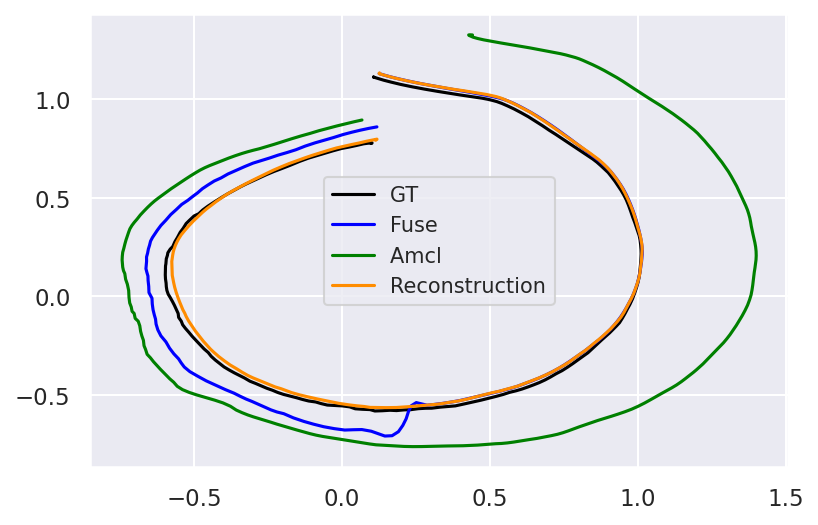

In [ ]:
x_gt = eval(df['gt'][0])[limit_min:limit_max]
y_gt = eval(df['gt'][1])[limit_min:limit_max]

x_ekf = eval(df['ekf'][0])[limit_min:-26]
y_ekf = eval(df['ekf'][1])[limit_min:-26]

x_amcl = eval(df['amcl'][0])[limit_min:-20]
y_amcl = eval(df['amcl'][1])[limit_min:-20]

x_reconstruction = eval(df['reconstruction'][0])[limit_min:limit_max]
y_reconstruction = eval(df['reconstruction'][1])[limit_min:limit_max]

x_gt_filtered = savgol_filter(x_gt, window_length=9, polyorder=2)
y_gt_filtered = savgol_filter(y_gt, window_length=9, polyorder=2)


x_ekf_filtered = savgol_filter(x_ekf, window_length=9, polyorder=2)
y_ekf_filtered = savgol_filter(y_ekf, window_length=9, polyorder=2)

x_amcl_filtered = savgol_filter(x_amcl, window_length=9, polyorder=2)
y_amcl_filtered = savgol_filter(y_amcl, window_length=9, polyorder=2)
 
x_reconstruction_filtered = savgol_filter(x_reconstruction, window_length=9, polyorder=2)
y_reconstruction_filtered = savgol_filter(y_reconstruction, window_length=9, polyorder=2)

plt.plot(x_gt_filtered, y_gt_filtered, color="black",  label='GT ')
plt.plot(x_ekf_filtered, y_ekf_filtered, color="blue",  label='Fuse ')
plt.plot(x_amcl_filtered, y_amcl_filtered, color="green",  label='Amcl ')
plt.plot(x_reconstruction_filtered, y_reconstruction_filtered, color="darkorange",  label='Reconstruction')


plt.legend(fontsize=10)
plt.show()


In [ ]:
print(
    len(x_gt ),
    len(x_ekf),
    len(x_amcl),
    len(x_reconstruction)
)

225 200 254 225


In [ ]:
x_gt = eval(df['gt'][0])[limit_min:limit_max]
y_gt = eval(df['gt'][1])[limit_min:limit_max]

x_ekf = eval(df['ekf'][0])[limit_min:-26]
y_ekf = eval(df['ekf'][1])[limit_min:-26]

x_amcl = eval(df['amcl'][0])[limit_min:-20]
y_amcl = eval(df['amcl'][1])[limit_min:-20]

x_reconstruction = eval(df['reconstruction'][0])[limit_min:limit_max]
y_reconstruction = eval(df['reconstruction'][1])[limit_min:limit_max]

x_gt = savgol_filter(x_gt, window_length=9, polyorder=2)
y_gt = savgol_filter(y_gt, window_length=9, polyorder=2)

x_amcl = delete_random_points(number_points = 48, number_list= list(x_amcl))
y_amcl = delete_random_points(number_points = 48, number_list= list(y_amcl))

x_ekf = savgol_filter(x_ekf, window_length=9, polyorder=2)
y_ekf = savgol_filter(y_ekf, window_length=9, polyorder=2)

x_amcl = savgol_filter(x_amcl, window_length=9, polyorder=2)
y_amcl = savgol_filter(y_amcl, window_length=9, polyorder=2)
 
x_reconstruction = savgol_filter(x_reconstruction, window_length=9, polyorder=2)
y_reconstruction = savgol_filter(y_reconstruction, window_length=9, polyorder=2)


error_amcl = dtw_error(x_gt, y_gt, x_amcl, y_amcl)
error_rec = dtw_error(x_gt, y_gt, x_reconstruction, y_reconstruction)
error_ekf = dtw_error(x_gt, y_gt, x_ekf, y_ekf)


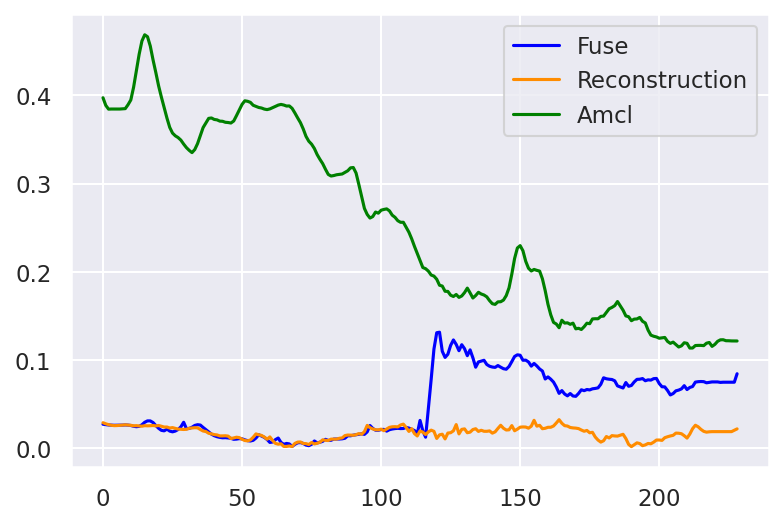

In [ ]:
len_min_error = min([len(error_ekf), len(error_amcl), len(error_rec)])


plt.plot(error_ekf[:len_min_error], color='blue', label = 'Fuse')
plt.plot(error_rec[:len_min_error], color='darkorange', label = 'Reconstruction')
plt.plot(error_amcl[:len_min_error], color='green', label = 'Amcl')
plt.legend()
plt.show()


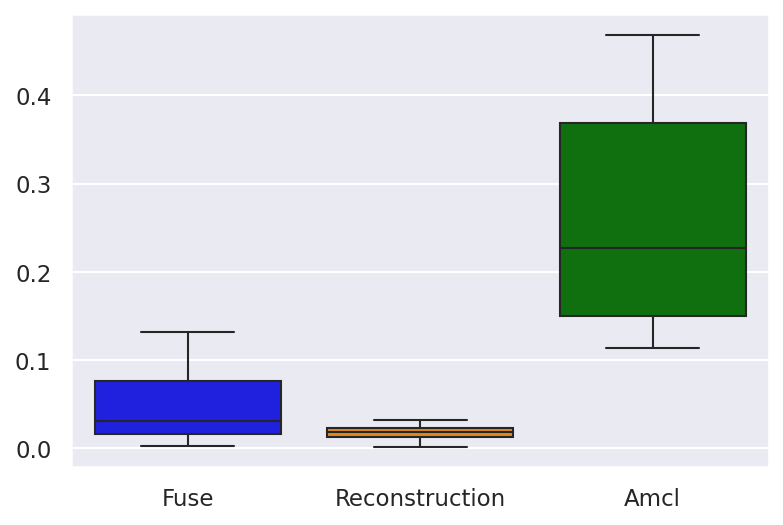

In [ ]:
fig, ax = plt.subplots()

d = {'Fuse': error_ekf[:len_min_error], 
     'Reconstruction': error_rec[:len_min_error],
     'Amcl': error_amcl[:len_min_error]}

d = pd.DataFrame(data=d)


my_pal = {"Fuse": "blue", "Reconstruction": "darkorange", "Amcl": "green"}

ax = sns.boxplot( data=d , linewidth=1, palette = my_pal)


plt.show()